# **🍷 Predicción de la Calidad del Vino con Machine Learning 🍷** 

## Introducción

El vino es una bebida con una gran variedad de características químicas y sensoriales que determinan su calidad. En este proyecto, utilizaremos un conjunto de datos con información sobre diferentes propiedades fisicoquímicas del vino para aplicar algoritmos de Machine Learning y predecir su calidad.

Para abordar este problema, exploraremos tanto enfoques de regresión numérica como de clasificación, aunque sabemos que uno de estos métodos podría no ser el más adecuado. Más allá de encontrar el mejor modelo, el objetivo principal de este trabajo es experimentar con distintos algoritmos, comparar su desempeño y analizar técnicas para mejorar sus resultados. A partir de este análisis, buscaremos extraer conclusiones relevantes sobre la efectividad de los diferentes enfoques en la predicción de la calidad del vino.  

El proyecto comenzará con un Análisis Exploratorio de Datos (EDA) para comprender la estructura del dataset y detectar posibles anomalías o patrones relevantes. Luego, aplicaremos modelos de Machine Learning siguiendo dos enfoques: regresión numérica y clasificación. En cada uno de estos, exploraremos estrategias de optimización como el ajuste de hiperparámetros (hyperparameter tuning), técnicas de balanceo de datos y estandarización para mejorar el rendimiento de los modelos. 


## **EDA**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")


In [2]:
url ="https://raw.githubusercontent.com/Ezegarcia07/wine_ML/refs/heads/main/winequality-red.csv"
df = pd.read_csv(url)

In [3]:
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1010,8.9,0.280,0.45,1.70,0.067,7.0,12.0,0.99354,3.25,0.55,12.3,7
1303,8.0,0.280,0.44,1.80,0.081,28.0,68.0,0.99501,3.36,0.66,11.2,5
1509,7.9,0.180,0.40,1.80,0.062,7.0,20.0,0.99410,3.28,0.70,11.1,5
64,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
303,7.4,0.670,0.12,1.60,0.186,5.0,21.0,0.99600,3.39,0.54,9.5,5


In [4]:
df.shape

(1599, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**No hay datos nulos**

In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Nuestro target es la columna `quality` (columna de numeros enteros con un rango de 0 a 10), y por lo que vemos arriba el 75% de los datos estan entre 0 y 6. Pensando en un ML de clasificacion, y tomando que un vino es de buena calidad si tiene un puntaje de 7 o mas, tenemos que nuestros datos estan bastante desbalanceados. Grafiquemos para ver con mas detalle esto mismo.

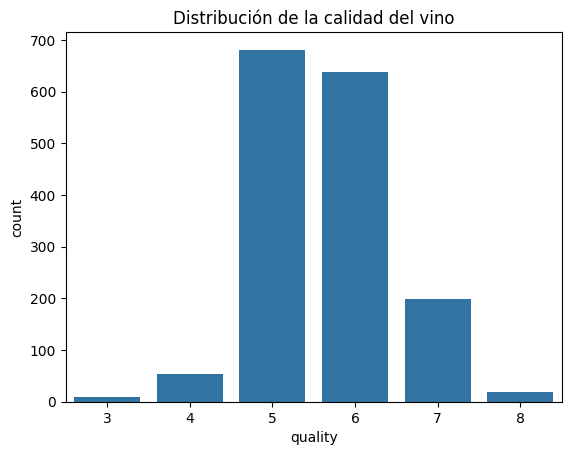

In [8]:
# Distribución de la calidad del vino
sns.countplot(x='quality', data=df)
plt.title('Distribución de la calidad del vino')
plt.show()

Al analizar la distribución de la variable objetivo en el gráfico, observamos que los valores 5 y 6 contienen la mayor cantidad de datos. Si consideramos que un vino de buena calidad es aquel con una calificación de 7 o superior, podemos notar un claro desbalance en los datos. Esto puede representar un desafío a la hora de aplicar modelos de clasificación, ya que la mayoría de las muestras pertenecen a categorías de menor calidad, lo que podría sesgar el modelo y afectar su capacidad de generalización. Para abordar este problema, exploraremos técnicas de balanceo de datos que nos ayuden a mejorar el desempeño del modelo y obtener predicciones más equitativas.  


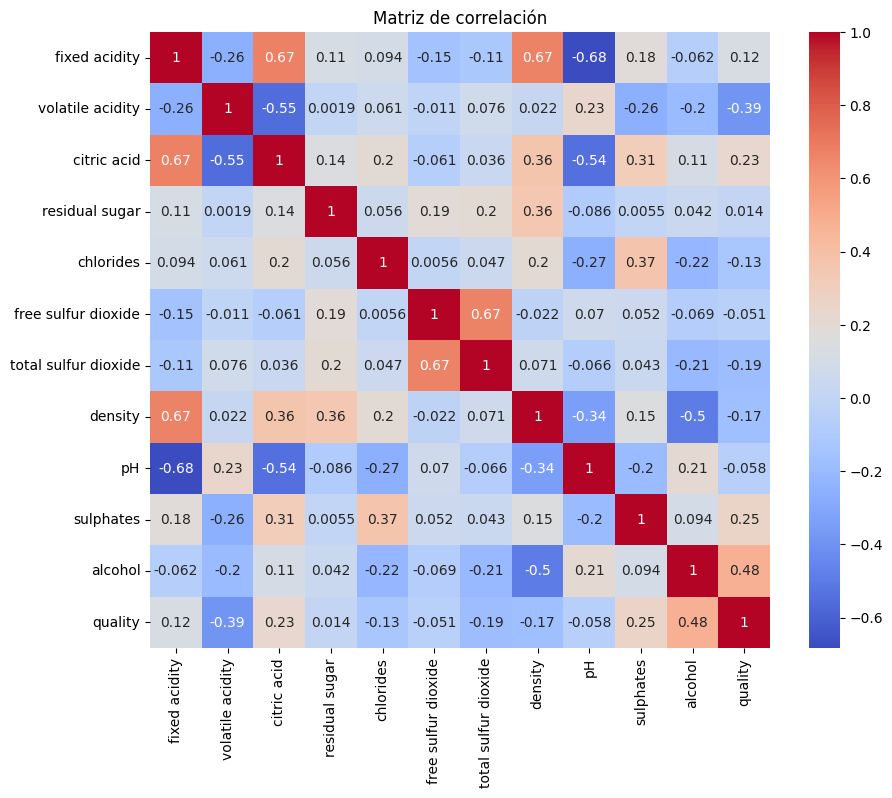

In [9]:
# Matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

A partir de la matriz de correlación, podemos identificar las variables que tienen mayor impacto en la calidad del vino. Entre ellas, destacan `alcohol`, `volatile acidity` y `sulphates` como las tres características más influyentes. Esto sugiere que el contenido de alcohol y la acidez volátil juegan un papel clave en la percepción de calidad del vino, mientras que la presencia de sulfitos también tiene una incidencia significativa. Estas variables serán especialmente relevantes al momento de construir y optimizar nuestros modelos de predicción.  


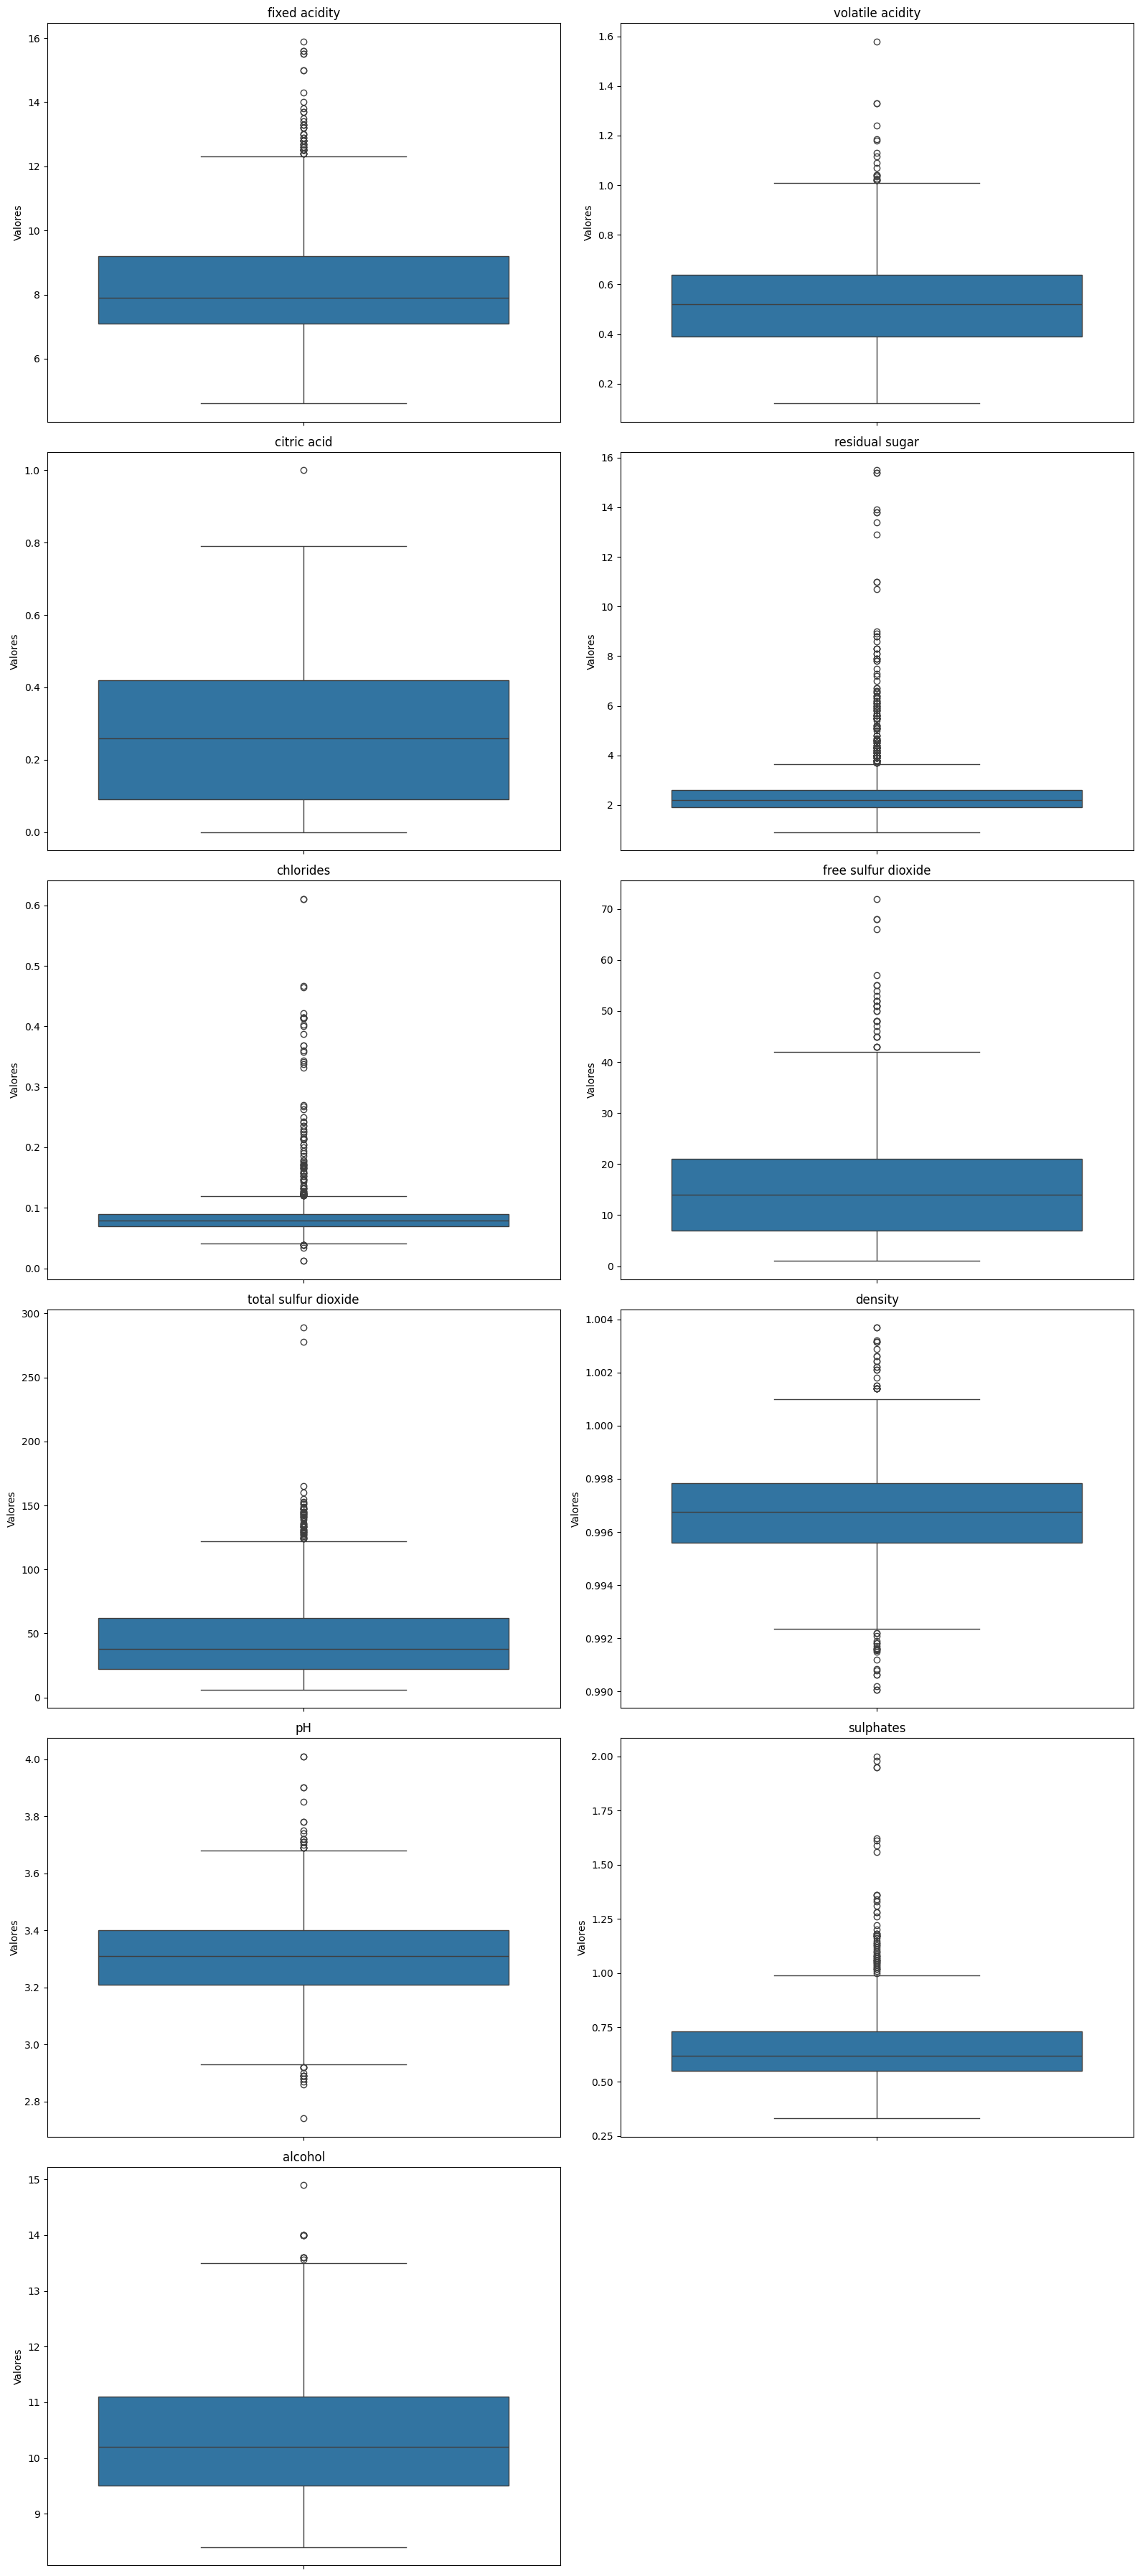

In [10]:
columnas = df.drop(columns='quality').columns

n_cols = 2
n_filas = (len(columnas) + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_filas, ncols=n_cols, figsize=(16, 6 * n_filas))

axes = axes.flatten()

for i, col in enumerate(columnas):
    sns.boxplot(data=df[col], ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_ylabel('Valores')

for j in range(len(columnas), n_filas * n_cols):
    axes[j].axis('off')

plt.tight_layout()

plt.show()

Los boxplots nos muestran que practicamente todas las variables tiene outliers, y estos inciden mucho en ciertos modelos de ML. Tambien tenemos que tener en cuenta que quizas esos outliers son los que realmente determinan si un vino es de buena o mala calidad.  
Basandonos en esto tendremos que elegir modelos robustos que puedan absorver estos outliers. Modelos como árboles de decisión, Random Forest o Gradient Boosting son menos sensibles a outliers y no se requiere un tratamiento especial de estos debido a la robustes del algoritmo. En cambio en modelos como KNN o Regresion lineal los outliers tiene mayor impacto distorsinando los resultados.  



### Conclusión del Análisis Exploratorio de Datos (EDA)  

El análisis exploratorio nos permitió identificar que el conjunto de datos contiene valores atípicos (outliers). Sin embargo, estos no serán eliminados ni modificados, ya que podrían estar directamente relacionados con la variable objetivo y aportar información valiosa para la predicción de la calidad del vino.  

Además, al abordar el problema como una tarea de clasificación, observamos un desbalance en la distribución de la variable objetivo. Esto podría afectar el desempeño de los modelos, por lo que aplicaremos técnicas específicas para mitigar este desequilibrio y mejorar la capacidad de generalización de los algoritmos.  

A partir de este punto, el trabajo se dividirá en dos enfoques:  
- **Clasificación:** Intentaremos predecir si un vino es de buena o mala calidad, aplicando distintos modelos y estrategias de balanceo de datos.  
- **Regresión numérica:** Buscaremos predecir directamente la calificación del vino, optimizando los modelos para mejorar su precisión.  

Este enfoque nos permitirá comparar ambos métodos y extraer conclusiones sobre cuál es el más adecuado para este problema.  


### **Regresión Numérica**  

En esta sección aplicaremos tres algoritmos de regresión numérica: **Regresión Lineal, Random Forest Regressor y XGBoost**. Nuestro objetivo es predecir la calidad del vino como un valor continuo, a pesar de que la variable objetivo en el conjunto de datos es discreta.  

Si bien sabemos de antemano que este enfoque puede no arrojar resultados óptimos, ya que estamos tratando de predecir valores enteros con modelos que generan salidas continuas, el propósito principal de este proyecto es explorar distintos algoritmos, analizar su desempeño y extraer conclusiones sobre su aplicabilidad en este contexto.  

A lo largo del proceso, evaluaremos el rendimiento de cada modelo y exploraremos técnicas para mejorar sus predicciones, como el ajuste de hiperparámetros y la estandarización de variables.  


##### **Regresión Lineal**  

Entre los modelos que probaremos, la regresión lineal es el que menos expectativas genera en términos de desempeño. Se trata de un modelo no robusto, altamente sensible a la presencia de outliers, los cuales hemos decidido no tratar, ya que pueden tener un impacto significativo en la variable objetivo.  

Además, la regresión lineal suele requerir la estandarización de variables para mejorar su rendimiento, especialmente cuando las características tienen escalas muy diferentes. A pesar de sus limitaciones, evaluaremos su desempeño en este contexto para entender cómo se comporta y qué tan bien puede aproximar la calidad del vino.  


In [11]:
from sklearn.model_selection import train_test_split

# Definir características (X) y variable objetivo (y)
X = df.drop(columns='quality')
y = df['quality']

# Dividir el dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler

# Estandarizar las variables predictoras
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
from sklearn.linear_model import LinearRegression

# Crear el modelo de Regresión Lineal
lr = LinearRegression()

# Entrenar el modelo
lr.fit(X_train_scaled, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_lr = lr.predict(X_test_scaled)

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Evaluar la regresión lineal
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("Regresión Lineal:")
print(f"MAE: {mae_lr:.3f}")
print(f"RMSE: {rmse_lr:.3f}")
print(f"R²: {r2_lr:.3f}")

Regresión Lineal:
MAE: 0.504
RMSE: 0.625
R²: 0.403


Los resultados obtenidos con la regresión lineal fueron pobres, con un **R² lejos de 1**, el valor ideal que indicaría un buen ajuste del modelo.  

Si bien las métricas como **MAE** y **RMSE** pueden parecer bajas, es importante considerar que la escala de los valores de la variable objetivo es relativamente pequeña, por lo que estos errores siguen siendo significativos. Además, ambas métricas pueden estar fuertemente afectadas por la presencia de outliers, lo que refuerza las limitaciones de este modelo en nuestro caso.  


##### **Random Forest Regressor**  

Este modelo es más robusto que la regresión lineal y tiene la ventaja de ser **menos sensible a los outliers y a la escala de las variables**. Gracias a su naturaleza basada en árboles de decisión, Random Forest puede manejar mejor las relaciones no lineales en los datos y mitigar el impacto de valores atípicos, lo que podría mejorar el desempeño en comparación con la regresión lineal.  

Sin embargo, al tratarse de un problema con una variable objetivo discreta, sigue existiendo la posibilidad de que los resultados no sean óptimos. Evaluaremos su rendimiento y analizaremos si las mejoras justifican su uso en este contexto.  


In [15]:
from sklearn.ensemble import RandomForestRegressor

# Crear el modelo con 100 árboles
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo
rf.fit(X_train, y_train)

# Hacer predicciones
y_pred_rf = rf.predict(X_test)


In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluación del modelo
mae = mean_absolute_error(y_test, y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2 = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor:")
print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²: {r2:.3f}")


Random Forest Regressor:
MAE: 0.422
RMSE: 0.549
R²: 0.539


**R²** de 0.539 no es excelente. Un valor cercano a 1 sería ideal, y valores por encima de 0.8 suelen considerarse buenos. Un R² de 0.539 nos indica que el modelo no explica completamente la variabilidad de los datos y podría mejorarse.  
**MAE y RMSE** relativamente bajos, pero tambien se debe a que estamos usando una escala pequeña.  
**RMSE > MAE** indica que hay algunos errores más grandes que el promedio.  

Un aspecto a tener en cuenta es que la variable objetivo es discreta mientras que las predicciones son continuas. Esto impacta de lleno en las metricas.

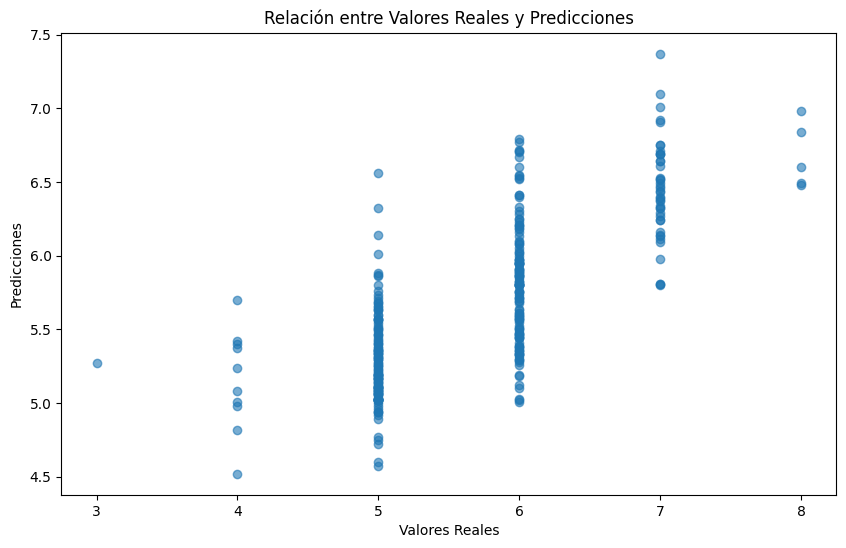

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.6)
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Relación entre Valores Reales y Predicciones')
plt.show()

Mirando el grafico podemos ver que en los extremos no tienen buena precision ni se acerca. Por ejempo para el dato que fue 3 el modelo nos predice 5.3, para los que fueron 8 nos lo predice entre 6.5 y 7.1 aprox.

Para mejorar el desempeño del modelo, aplicaremos **técnicas de optimización mediante ajuste de hiperparámetros (Hyperparameter Tuning)**. Random Forest cuenta con varios parámetros clave que pueden influir en su rendimiento, como el número de árboles (`n_estimators`), la profundidad máxima (`max_depth`), el número mínimo de muestras por hoja (`min_samples_leaf`), entre otros.  

Utilizaremos enfoques como **Grid Search** para encontrar la mejor combinación de hiperparámetros y evaluar si estos ajustes logran mejorar las métricas del modelo. Nuestro objetivo es reducir el error y mejorar la capacidad predictiva del modelo, manteniendo un balance entre precisión y generalización.  


In [18]:
from sklearn.model_selection import GridSearchCV

# Definir el modelo base
rf = RandomForestRegressor(random_state=42)

# Definir el grid de hiperparámetros
param_grid = {
    "n_estimators": [100, 200, 300],       # Número de árboles
    "max_depth": [10, 20, None],           # Profundidad máxima del árbol
    "min_samples_split": [2, 5, 10],       # Mínimo de muestras para dividir nodo
    "min_samples_leaf": [1, 2, 4],         # Mínimo de muestras en una hoja
    "max_features": ["sqrt", "log2", None] # Número de características por división
}

# GridSearch con validación cruzada de 5 folds
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring="r2", n_jobs=-1, verbose=2)

# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Mejores hiperparámetros encontrados:
{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [19]:
# Obtener el mejor modelo encontrado
best_rf = grid_search.best_estimator_

# Hacer predicciones en el conjunto de prueba
y_pred_best_rf = best_rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_best_rf)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_best_rf))
r2 = r2_score(y_test, y_pred_best_rf)

print("Random Forest Ajustado:")
print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²: {r2:.3f}")


Random Forest Ajustado:
MAE: 0.415
RMSE: 0.541
R²: 0.552


Tras aplicar técnicas de optimización, el rendimiento del modelo **mejoró con respecto a los resultados iniciales**, aunque la mejora no fue tan significativa. Esto era esperable, ya que estamos tratando de predecir una variable discreta utilizando un modelo de regresión, que genera valores continuos.  

La diferencia en la naturaleza de los datos sigue siendo un factor limitante, lo que hace difícil alcanzar un ajuste mucho más preciso. Aun así, la optimización nos permitió reducir el error en cierta medida y entender mejor las capacidades y limitaciones de Random Forest en este contexto.  


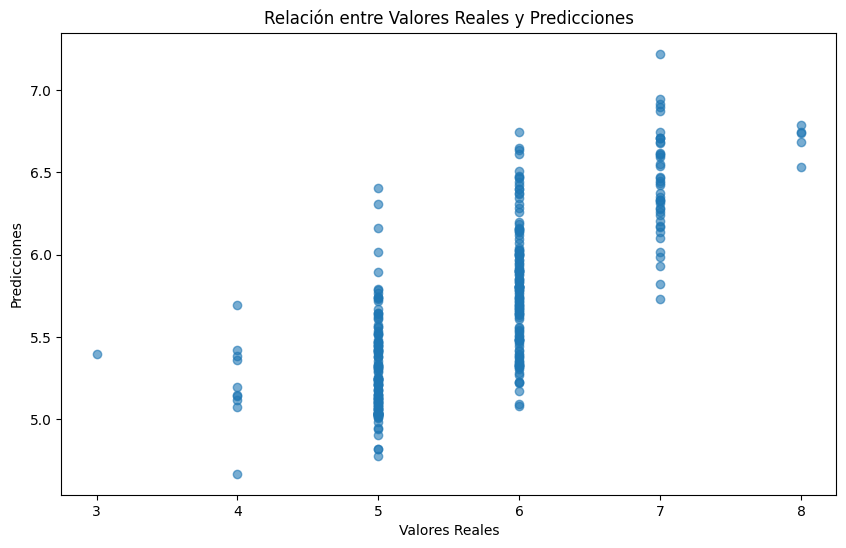

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best_rf, alpha=0.6)
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Relación entre Valores Reales y Predicciones')
plt.show()

##### **XGBoost**  

Probablemente este sea el modelo del que más se espera en este análisis. **XGBoost** es un algoritmo potente y optimizado basado en boosting, que generalmente ofrece un mejor rendimiento en comparación con modelos más simples.  

Al ser un modelo robusto, **no se ve afectado significativamente por outliers ni por la escala de las variables**, lo que lo hace adecuado para este tipo de problema.

A continuación, evaluaremos su desempeño y analizaremos si logra superar a Random Forest en términos de precisión y error. 

Para optimizar el rendimiento de **XGBoost**, aplicaremos directamente **GridSearchCV** para realizar el ajuste de hiperparámetros desde el inicio. Esto nos permitirá encontrar la mejor combinación de parámetros sin necesidad de probar primero una versión base del modelo.  

In [21]:
import xgboost as xgb

# Definir el modelo base
xg_reg = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)

# Definir el grid de hiperparámetros
param_grid_xgb = {
    "n_estimators": [100, 200, 300],        # Número de árboles
    "learning_rate": [0.01, 0.1, 0.2],      # Tasa de aprendizaje
    "max_depth": [3, 6, 10],                 # Profundidad máxima del árbol
    "min_child_weight": [1, 3, 5],           # Peso mínimo por nodo hijo
    "subsample": [0.8, 0.9, 1.0],            # Submuestra de datos
    "colsample_bytree": [0.8, 0.9, 1.0]      # Submuestra de características por árbol
}

# GridSearch con validación cruzada de 5 folds
grid_search_xgb = GridSearchCV(xg_reg, param_grid_xgb, cv=5, scoring="r2", n_jobs=-1, verbose=2)

# Ajustar el modelo a los datos de entrenamiento
grid_search_xgb.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados para XGBoost:")
print(grid_search_xgb.best_params_)


Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Mejores hiperparámetros encontrados para XGBoost:
{'colsample_bytree': 0.9, 'learning_rate': 0.01, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.9}


In [22]:
# Obtener el mejor modelo encontrado por GridSearch
best_xgb = grid_search_xgb.best_estimator_

# Hacer predicciones en el conjunto de prueba
y_pred_best_xgb = best_xgb.predict(X_test)

# Evaluar el modelo
mae_xgb = mean_absolute_error(y_test, y_pred_best_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_best_xgb))
r2_xgb = r2_score(y_test, y_pred_best_xgb)

print("XGBoost Ajustado:")
print(f"MAE: {mae_xgb:.3f}")
print(f"RMSE: {rmse_xgb:.3f}")
print(f"R²: {r2_xgb:.3f}")


XGBoost Ajustado:
MAE: 0.420
RMSE: 0.552
R²: 0.533


##### Comparacion de modelos

In [23]:
models = ["Random Forest", "XGBoost", "Regresión Lineal"]
mae_scores = [mae, mae_xgb, mae_lr]
rmse_scores = [rmse, rmse_xgb, rmse_lr]
r2_scores = [r2, r2_xgb, r2_lr]

df_comparison = pd.DataFrame({
    "Modelo": models, 
    "MAE": mae_scores, 
    "RMSE": rmse_scores, 
    "R²": r2_scores
})

print(df_comparison)


             Modelo       MAE      RMSE        R²
0     Random Forest  0.414947  0.541165  0.551864
1           XGBoost  0.419928  0.552418  0.533033
2  Regresión Lineal  0.503530  0.624520  0.403180


**Random Forest** parece tener un desempeño ligeramente superior en todas las métricas (MAE, RMSE, R²), aunque las diferencias no son significativas. Los valores de **R²** siguen estando lejos de acercarse al valor ideal de 1, lo que indica que el modelo no logra capturar todo el comportamiento de los datos.  

Es importante recordar que el bajo valor de **R²** es esperado, dado que estamos tratando de predecir una variable discreta con un modelo de regresión, lo que introduce una discrepancia entre el tipo de modelo y el tipo de variable objetivo.  

##### **Estrategia de redondeo**

Dado que la variable objetivo es discreta, y los modelos que estamos utilizando generan predicciones continuas, una estrategia que exploraremos es **redondear los valores predichos** por cada uno de los modelos para convertirlos en valores enteros. Esto nos permitirá evaluar el **accuracy** de los modelos, ya que podemos comparar las predicciones redondeadas con las etiquetas reales de calidad del vino.

El cálculo del **accuracy** nos dará una métrica más adecuada para medir qué tan acertadas son las predicciones en términos de clasificación, ya que ahora estamos considerando una variable discreta. A través de esta técnica, podremos ver de manera más clara qué tan bien están funcionando nuestros modelos en términos de predicción exacta de la calidad del vino.

In [24]:
y_pred_best_rf_rounded = np.round(y_pred_best_rf)   # Para Random Forest
y_pred_best_xgb_rounded = np.round(y_pred_best_xgb) # Para XGBoost
y_pred_lr_rounded = np.round(y_pred_lr)             # Para Regresión Lineal


In [25]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluar Random Forest
print("Random Forest - Clasificación")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_rf_rounded):.3f}")
report_rf = classification_report(y_test, y_pred_best_rf_rounded)
for line in report_rf.splitlines():
    print(line)

# Evaluar XGBoost
print("\nXGBoost - Clasificación")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_xgb_rounded):.3f}")
report_xgb = classification_report(y_test, y_pred_best_xgb_rounded)
for line in report_xgb.splitlines():
    print(line)


Random Forest - Clasificación
Accuracy: 0.666
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.70      0.78      0.74       130
           6       0.64      0.71      0.67       132
           7       0.63      0.40      0.49        42
           8       0.00      0.00      0.00         5

    accuracy                           0.67       320
   macro avg       0.33      0.32      0.32       320
weighted avg       0.63      0.67      0.64       320

XGBoost - Clasificación
Accuracy: 0.650
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.70      0.74      0.72       130
           6       0.61      0.72      0.66       132
           7       0.68      0.40      0.51        42
           8       0.00      0.00      0.00   

In [26]:

# Evaluar Regresión Lineal
print("\nRegresión Lineal - Clasificación")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr_rounded):.3f}")
report_lr = classification_report(y_test, y_pred_lr_rounded)
for line in report_lr.splitlines():
    print(line)


Regresión Lineal - Clasificación
Accuracy: 0.572
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.65      0.70      0.67       130
           6       0.53      0.66      0.59       132
           7       0.36      0.12      0.18        42
           8       0.00      0.00      0.00         5

    accuracy                           0.57       320
   macro avg       0.25      0.25      0.24       320
weighted avg       0.53      0.57      0.54       320


Los resultados obtenidos utilizando la estrategia de **regresión seguida de redondeo de resultados** no han sido los esperados y no muestran un buen rendimiento de los modelos. En el caso de **Random Forest**, donde se alcanza el valor mas alto, tenemos una **accuracy de 0.66**, lo cual es un valor relativamente bajo para el objetivo de predecir la calidad del vino con precisión.

Al probar este enfoque, tanto utilizando regresión directamente como al intentar redondear los resultados para compararlos con la variable objetivo, llegamos a la conclusión de que ninguno de los dos métodos es adecuado para este tipo de problema. Las métricas obtenidas están lejos de ser satisfactorias, lo que indica que ni la regresión ni la estrategia de redondeo de los resultados son efectivas para predecir una variable discreta como la calidad del vino.

### Modelos de Clasificacion

En esta parte del proyecto, utilizaremos los algoritmos **Random Forest Classifier** y **XGBoost** para abordar el problema desde la perspectiva de la **clasificación**. A priori, se espera que estos modelos ofrezcan mejores resultados que los obtenidos mediante regresión numérica, ya que estamos trabajando directamente con una variable discreta y categórica.

Para la preparación de los datos, primero definimos qué significa tener un vino de "buena calidad". En este caso, asumimos que un vino con una calificación **≥ 7** se considera de **"buena calidad"** (valor 1), mientras que aquellos con una calificación **≤ 6** se consideran de **"baja calidad"** (valor 0).  

In [27]:
df_classification = df.copy()

# Crear la variable objetivo (target): 'good_quality' -> 1 si calidad >= 7, 0 si no
df_classification['good_quality'] = (df_classification['quality'] >= 7).astype(int)

# Ver las primeras filas con la nueva columna
df_classification[['quality', 'good_quality']].sample(10)


,quality,good_quality
885,5,0
848,5,0
990,5,0
1507,6,0
1072,6,0
588,8,1
30,5,0
851,5,0
938,7,1
194,5,0


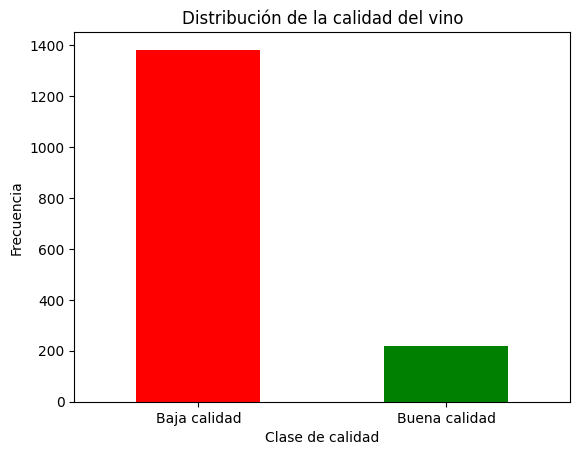

In [28]:
# Distribución de la variable objetivo
df_classification['good_quality'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.title('Distribución de la calidad del vino')
plt.xlabel('Clase de calidad')
plt.ylabel('Frecuencia')
plt.xticks(ticks=[0, 1], labels=['Baja calidad', 'Buena calidad'], rotation=0)
plt.show()

Es importante analizar la distribución de la variable objetivo, ya que en este caso observamos que el conjunto de datos está **desbalanceado**. Esto puede afectar el desempeño de los modelos de clasificación, ya que el modelo tiende a favorecer la clase mayoritaria.

Para abordar este desbalance, aplicaremos **métodos de balanceo de la muestra**, como el sobremuestreo de la clase minoritaria o el submuestreo de la clase mayoritaria. De esta forma, buscaremos equilibrar las clases y mejorar la capacidad del modelo para predecir ambas clases con mayor precisión.

Para evaluar el impacto de estos métodos, ejecutaremos los algoritmos antes y después de aplicar el balanceo y compararemos los resultados obtenidos en cada caso.

##### **Random Forest Classifier**

In [29]:
# Separar características (X) y objetivo (y)
X = df_classification.drop(['quality', 'good_quality'], axis=1)
y = df_classification['good_quality']

# División en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Crear el clasificador de Random Forest
clf = RandomForestClassifier(random_state=42)

# Entrenar el modelo
clf.fit(X_train, y_train)

# Realizar predicciones
y_pred_rfc = clf.predict(X_test)

# Evaluar el modelo
print('Precisión del modelo:', accuracy_score(y_test, y_pred_rfc))
print('Reporte de clasificación:\n', classification_report(y_test, y_pred_rfc))


Precisión del modelo: 0.9
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94       273
           1       0.73      0.51      0.60        47

    accuracy                           0.90       320
   macro avg       0.82      0.74      0.77       320
weighted avg       0.89      0.90      0.89       320



**Precisión (Accuracy):** 0.90, lo que indica un buen rendimiento global.

- **Clase 0 (mayoría):** Buen rendimiento, el modelo detecta correctamente la clase mayoritaria.
- **Clase 1 (minoría):** Bajo rendimiento con muchos falsos negativos.

**Promedios:**
- **Macro average:** F1-Score de 0.77.
- **Weighted average:** F1-Score de 0.89, reflejando un mejor rendimiento para la clase mayoritaria.

**Conclusión:**  
El modelo tiene un buen desempeño para la clase mayoritaria (0), pero presenta dificultades para predecir la clase minoritaria (1). Es evidente que el desbalanceo de los datos de la variable objetivo influye en este resultado. Para mejorar la predicción de la clase minoritaria, aplicaremos los métodos de balanceo **RandomUnderSampler** (submuestreo) y **SMOTE** (sobremuestreo), para luego comparar sus resultados.

In [31]:
from imblearn.under_sampling import RandomUnderSampler

# Aplicar submuestreo para balancear las clases
undersampler = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = undersampler.fit_resample(X_train, y_train)

# Ver cuántos ejemplos tenemos ahora
print(f"Clases en el conjunto de entrenamiento balanceado:\n{y_train_rus.value_counts()}")


Clases en el conjunto de entrenamiento balanceado:
good_quality
0    170
1    170
Name: count, dtype: int64


In [32]:
clf = RandomForestClassifier(random_state=42, class_weight='balanced')

In [33]:
# Crear el clasificador de Random Forest (con peso balanceado)
clf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Entrenar el modelo con los datos balanceados
clf.fit(X_train_rus, y_train_rus)

# Realizar predicciones
y_pred_rfc_rus = clf.predict(X_test)

# Evaluar el modelo
print('Precisión del modelo:', accuracy_score(y_test, y_pred_rfc_rus))  
print('Reporte de clasificación:\n', classification_report(y_test, y_pred_rfc_rus))


Precisión del modelo: 0.821875
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.99      0.80      0.88       273
           1       0.45      0.96      0.61        47

    accuracy                           0.82       320
   macro avg       0.72      0.88      0.75       320
weighted avg       0.91      0.82      0.84       320



In [34]:
from imblearn.over_sampling import SMOTE

# Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_train_smo, y_train_smo = smote.fit_resample(X_train, y_train)

# Ver cuántos ejemplos tenemos ahora
print(f"Clases en el conjunto de entrenamiento balanceado:\n{y_train_smo.value_counts()}")


Clases en el conjunto de entrenamiento balanceado:
good_quality
0    1109
1    1109
Name: count, dtype: int64


In [35]:
clf = RandomForestClassifier(random_state=42, class_weight='balanced')


In [36]:
# Crear el clasificador de Random Forest (con peso balanceado)
clf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Entrenar el modelo con los datos balanceados
clf.fit(X_train_smo, y_train_smo)

# Realizar predicciones
y_pred_rfc_smo = clf.predict(X_test)

# Evaluar el modelo
print('Precisión del modelo:', accuracy_score(y_test, y_pred_rfc_smo))
print('Reporte de clasificación:\n', classification_report(y_test, y_pred_rfc_smo))


Precisión del modelo: 0.9125
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95       273
           1       0.67      0.81      0.73        47

    accuracy                           0.91       320
   macro avg       0.82      0.87      0.84       320
weighted avg       0.92      0.91      0.92       320



In [37]:
# Calcular los reportes de clasificación para cada modelo
report_rfc = classification_report(y_test, y_pred_rfc, output_dict=True)
report_rfc_rus = classification_report(y_test, y_pred_rfc_rus, output_dict=True)
report_rfc_smo = classification_report(y_test, y_pred_rfc_smo, output_dict=True)

# Crear un diccionario con las métricas a comparar
results = {
    'Modelo': ['Original', 'Con rebalanceo (Random Under-Sampling)', 'Con rebalanceo (SMOTE)'],
    'Accuracy Total': [
        accuracy_score(y_test, y_pred_rfc),
        accuracy_score(y_test, y_pred_rfc_rus),
        accuracy_score(y_test, y_pred_rfc_smo)
    ],
    'Precisión Clase 0': [
        report_rfc['0']['precision'],
        report_rfc_rus['0']['precision'],
        report_rfc_smo['0']['precision']
    ],
    'Recall Clase 0': [
        report_rfc['0']['recall'],
        report_rfc_rus['0']['recall'],
        report_rfc_smo['0']['recall']
    ],
    'Precisión Clase 1': [
        report_rfc['1']['precision'],
        report_rfc_rus['1']['precision'],
        report_rfc_smo['1']['precision']
    ],
    'Recall Clase 1': [
        report_rfc['1']['recall'],
        report_rfc_rus['1']['recall'],
        report_rfc_smo['1']['recall']
    ],
    'F1-Score Clase 0': [
        report_rfc['0']['f1-score'],
        report_rfc_rus['0']['f1-score'],
        report_rfc_smo['0']['f1-score']
    ],
    'F1-Score Clase 1': [
        report_rfc['1']['f1-score'],
        report_rfc_rus['1']['f1-score'],
        report_rfc_smo['1']['f1-score']
    ],
    'F1-Score Macro': [
        report_rfc['macro avg']['f1-score'],
        report_rfc_rus['macro avg']['f1-score'],
        report_rfc_smo['macro avg']['f1-score']
    ]
}

# Crear un DataFrame para visualizar los resultados
comparison_df = pd.DataFrame(results)

# Mostrar la tabla comparativa
comparison_df


,Modelo,Accuracy Total,Precisión Clase 0,Recall Clase 0,Precisión Clase 1,Recall Clase 1,F1-Score Clase 0,F1-Score Clase 1,F1-Score Macro
0,Original,0.900000,0.919861,0.967033,0.727273,0.510638,0.942857,0.600000,0.771429
1,Con rebalanceo (Random Under-Sampling),0.821875,0.990909,0.798535,0.450000,0.957447,0.884381,0.612245,0.748313
2,Con rebalanceo (SMOTE),0.912500,0.965779,0.930403,0.666667,0.808511,0.947761,0.730769,0.839265


El modelo original tiene una precisión total del 90%, con buen rendimiento en la clase 0 (baja calidad) pero bajo recall en la clase 1 (buena calidad). El rebalanceo mediante **Random Under-Sampling** mejora la precisión de la clase 0, pero reduce considerablemente el rendimiento general (precisión total de 82.19%), con un recall alto en la clase 1, aunque con baja precisión. **SMOTE** logra un buen equilibrio, manteniendo una precisión total de 91.25%, mejorando significativamente el recall de la clase 1 sin perder demasiado en la clase 0. 

En resumen, **SMOTE** ha demostrado ser el mejor enfoque, logrando el mejor rendimiento general sin comprometer demasiado las clases. Apliquemos **hiperparametrización** sobre este modelo para optimizar su desempeño.  


In [38]:
# Definir el espacio de hiperparámetros a explorar
param_grid = {
    'n_estimators': [50, 100, 200],  # Número de árboles en el bosque
    'max_depth': [10, 20, 30, None],  # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],  # Mínimo de muestras necesarias para dividir un nodo
    'min_samples_leaf': [1, 2, 4],  # Mínimo de muestras necesarias en una hoja
    'criterion': ['gini', 'entropy'],  # Función para medir la calidad de una división
}

# Inicializar el modelo
rfc = RandomForestClassifier(random_state=42)

# Aplicar GridSearchCV
grid_search = GridSearchCV(
    estimator=rfc,
    param_grid=param_grid,
    cv=5,  # Validación cruzada con 5 folds
    scoring='f1_macro',  # Optimizar el F1-score macro para balancear ambas clases
    n_jobs=-1,  # Usar todos los núcleos disponibles
    verbose=2
)

# Ajustar el modelo con los datos balanceados (SMOTE ya aplicado)
grid_search.fit(X_train_smo, y_train_smo)

# Obtener los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:", grid_search.best_params_)

# Evaluar el modelo con los mejores hiperparámetros
best_model = grid_search.best_estimator_
y_pred_rfc_smo_best = best_model.predict(X_test)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Mejores hiperparámetros encontrados: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [39]:
# Comparacion de métricas
print('Precisión del modelo:', accuracy_score(y_test, y_pred_rfc_smo))
print('Reporte de clasificación:\n', classification_report(y_test, y_pred_rfc_smo))
print("Precisión del modelo optimizado:", accuracy_score(y_test, y_pred_rfc_smo_best))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred_rfc_smo_best))

Precisión del modelo: 0.9125
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95       273
           1       0.67      0.81      0.73        47

    accuracy                           0.91       320
   macro avg       0.82      0.87      0.84       320
weighted avg       0.92      0.91      0.92       320

Precisión del modelo optimizado: 0.9125
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95       273
           1       0.66      0.83      0.74        47

    accuracy                           0.91       320
   macro avg       0.82      0.88      0.84       320
weighted avg       0.92      0.91      0.92       320



Se observa una ligera mejora en el **F1-score** de la clase 1, con un mayor **recall**, pero el resto de las métricas se mantienen prácticamente iguales. Probemos otro algoritmo...


##### **XGBoost**

In [40]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    objective='binary:logistic',  # Para clasificación binaria
    eval_metric='logloss',  # Función de evaluación
    use_label_encoder=False,  # Evitar warnings de compatibilidad
    random_state=42
)

# Entrenar el modelo
xgb.fit(X_train, y_train)

# Hacer predicciones
y_pred_xgbc = xgb.predict(X_test)

In [41]:
from imblearn.under_sampling import RandomUnderSampler

# Aplicar submuestreo para balancear las clases
undersampler = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = undersampler.fit_resample(X_train, y_train)

xgb = XGBClassifier(
    objective='binary:logistic',  # Para clasificación binaria
    eval_metric='logloss',  # Función de evaluación
    use_label_encoder=False,  # Evitar warnings de compatibilidad
    random_state=42
)

# Entrenar el modelo
xgb.fit(X_train_rus, y_train_rus)

# Hacer predicciones
y_pred_xgbc_rus = xgb.predict(X_test)

In [42]:
from imblearn.over_sampling import SMOTE

# Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_train_smo, y_train_smo = smote.fit_resample(X_train, y_train)

xgb = XGBClassifier(
    objective='binary:logistic',  # Para clasificación binaria
    eval_metric='logloss',  # Función de evaluación
    use_label_encoder=False,  # Evitar warnings de compatibilidad
    random_state=42
)

# Entrenar el modelo
xgb.fit(X_train_smo, y_train_smo)

# Hacer predicciones
y_pred_xgbc_smo = xgb.predict(X_test)

In [43]:
# Calcular los reportes de clasificación para cada modelo
report_xgbc = classification_report(y_test, y_pred_xgbc, output_dict=True)
report_xgbc_rus = classification_report(y_test, y_pred_xgbc_rus, output_dict=True)
report_xgbc_smo = classification_report(y_test, y_pred_xgbc_smo, output_dict=True)

# Crear un diccionario con las métricas a comparar
results = {
    'Modelo': ['Original', 'Con rebalanceo (Random Under-Sampling)', 'Con rebalanceo (SMOTE)'],
    'Accuracy Total': [
        accuracy_score(y_test, y_pred_xgbc),
        accuracy_score(y_test, y_pred_xgbc_rus),
        accuracy_score(y_test, y_pred_xgbc_smo)
    ],
    'Precisión Clase 0': [
        report_xgbc['0']['precision'],
        report_xgbc_rus['0']['precision'],
        report_xgbc_smo['0']['precision']
    ],
    'Recall Clase 0': [
        report_xgbc['0']['recall'],
        report_xgbc_rus['0']['recall'],
        report_xgbc_smo['0']['recall']
    ],
    'Precisión Clase 1': [
        report_xgbc['1']['precision'],
        report_xgbc_rus['1']['precision'],
        report_xgbc_smo['1']['precision']
],
    'Recall Clase 1': [
        report_xgbc['1']['recall'],
        report_xgbc_rus['1']['recall'],
        report_xgbc_smo['1']['recall']
    ],
    'F1-Score Clase 0': [
        report_xgbc['0']['f1-score'],
        report_xgbc_rus['0']['f1-score'],
        report_xgbc_smo['0']['f1-score']
    ],
    'F1-Score Clase 1': [
        report_xgbc['1']['f1-score'],
        report_xgbc_rus['1']['f1-score'],
        report_xgbc_smo['1']['f1-score']
    ],
    'F1-Score Macro': [
        report_xgbc['macro avg']['f1-score'],
        report_xgbc_rus['macro avg']['f1-score'],
        report_xgbc_smo['macro avg']['f1-score']
    ]
}

# Crear un DataFrame para visualizar los resultados
comparison_df = pd.DataFrame(results)

# Mostrar la tabla comparativa
comparison_df



,Modelo,Accuracy Total,Precisión Clase 0,Recall Clase 0,Precisión Clase 1,Recall Clase 1,F1-Score Clase 0,F1-Score Clase 1,F1-Score Macro
0,Original,0.915625,0.936170,0.967033,0.763158,0.617021,0.951351,0.682353,0.816852
1,Con rebalanceo (Random Under-Sampling),0.793750,0.981395,0.772894,0.409524,0.914894,0.864754,0.565789,0.715272
2,Con rebalanceo (SMOTE),0.906250,0.951673,0.937729,0.666667,0.723404,0.944649,0.693878,0.819263


Los resultados muestran diferencias clave según el método de balanceo aplicado:  

- **Sin balanceo:** Mejor **accuracy** en generale, pero bajo **recall** en la clase 1.  
- **Random Under-Sampling:** Alto **recall** en la clase 1, pero muy baja **precisión** y menor **accuracy** total.  
- **SMOTE:** Buen **accuracy**, buenos resultados en la clase 0, **recall** aceptable en la clase 1, pero precisión baja en esta misma.  

En conclusión, **ningún método es claramente superior**, aunque **SMOTE** parece ofrecer un mejor equilibrio. Sin embargo, las diferencias no son significativas en comparación con el modelo sin balanceo.  

Para mejorar el rendimiento, aplicaremos técnicas de **optimización de hiperparámetros**, como **GridSearchCV** en el algoritmo sin balancear y en el de **SMOTE**


In [44]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)

# 7. Definir el espacio de hiperparámetros a explorar
param_grid = {
    'n_estimators': [50, 100, 200],  # Número de árboles
    'max_depth': [3, 6, 10],  # Profundidad máxima del árbol
    'learning_rate': [0.01, 0.1, 0.2],  # Tasa de aprendizaje
    'subsample': [0.7, 0.8, 1.0],  # Proporción de muestras usadas para entrenar cada árbol
    'colsample_bytree': [0.7, 0.8, 1.0],  # Proporción de características usadas por árbol
    'gamma': [0, 0.1, 0.2],  # Reducir la sobreajuste penalizando divisiones de nodos
}

# 8. Aplicar GridSearchCV para encontrar los mejores hiperparámetros
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='f1_macro',  # Optimizar F1-score macro para balancear ambas clases
    cv=5,  # Validación cruzada de 5 folds
    n_jobs=-1,  # Usar todos los núcleos disponibles
    verbose=2
)

# 9. Ajustar el modelo con los datos balanceados (SMOTE aplicado)
grid_search.fit(X_train, y_train)

# 10. Obtener los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:", grid_search.best_params_)

# 11. Evaluar el modelo optimizado en el conjunto de prueba
best_xgb = grid_search.best_estimator_
y_pred_xgb_best = best_xgb.predict(X_test)

# 12. Mostrar métricas de desempeño
print("Precisión del modelo optimizado:", accuracy_score(y_test, y_pred_xgb_best))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred_xgb_best))

Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Mejores hiperparámetros encontrados: {'colsample_bytree': 0.7, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'subsample': 0.8}
Precisión del modelo optimizado: 0.9125
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       273
           1       0.77      0.57      0.66        47

    accuracy                           0.91       320
   macro avg       0.85      0.77      0.80       320
weighted avg       0.91      0.91      0.91       320



In [45]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)

# 7. Definir el espacio de hiperparámetros a explorar
param_grid = {
    'n_estimators': [50, 100, 200],  # Número de árboles
    'max_depth': [3, 6, 10],  # Profundidad máxima del árbol
    'learning_rate': [0.01, 0.1, 0.2],  # Tasa de aprendizaje
    'subsample': [0.7, 0.8, 1.0],  # Proporción de muestras usadas para entrenar cada árbol
    'colsample_bytree': [0.7, 0.8, 1.0],  # Proporción de características usadas por árbol
    'gamma': [0, 0.1, 0.2],  # Reducir la sobreajuste penalizando divisiones de nodos
}

# 8. Aplicar GridSearchCV para encontrar los mejores hiperparámetros
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='f1_macro',  # Optimizar F1-score macro para balancear ambas clases
    cv=5,  # Validación cruzada de 5 folds
    n_jobs=-1,  # Usar todos los núcleos disponibles
    verbose=2
)

# 9. Ajustar el modelo con los datos balanceados (SMOTE aplicado)
grid_search.fit(X_train_smo, y_train_smo)

# 10. Obtener los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:", grid_search.best_params_)

# 11. Evaluar el modelo optimizado en el conjunto de prueba
best_xgb = grid_search.best_estimator_
y_pred_xgb_bestsmo = best_xgb.predict(X_test)

# 12. Mostrar métricas de desempeño
print("Precisión del modelo optimizado:", accuracy_score(y_test, y_pred_xgb_bestsmo))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred_xgb_bestsmo))

Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Mejores hiperparámetros encontrados: {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 200, 'subsample': 1.0}
Precisión del modelo optimizado: 0.921875
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       273
           1       0.71      0.79      0.75        47

    accuracy                           0.92       320
   macro avg       0.84      0.87      0.85       320
weighted avg       0.93      0.92      0.92       320



Con la **hiperparametrización**, observamos que el modelo utilizando **SMOTE** obtiene las mejores métricas hasta el momento. La **clase 0** presenta resultados óptimos, mientras que la **clase 1** muestra métricas aceptables, con un **recall de 0.79** y una **precisión de 0.71**. Este es el modelo más balanceado hasta ahora, como lo demuestra su **F1-score**, el más alto entre todos los modelos probados.  

La **accuracy total** alcanza un **0.92**, un valor más que satisfactorio, y el **F1-score macro de 0.85** confirma que este modelo logra la mejor armonización entre ambas clases.  

Aun así, tratemos de intentar **mejorar la precisión de la clase 1** y equilibrar aún más los resultados. Probemos algunas **técnicas adicionales o modelos alternativos** para optimizar el desempeño general.  


**XGBoost con un ajuste de peso**

In [46]:
# Ajustar XGBoost para darle más peso a la clase 1
xgb_model_weighted = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42,
    scale_pos_weight=3  # Ajustamos el peso de la clase 1 (buena calidad)
)

# 9. Aplicar GridSearchCV para encontrar los mejores hiperparámetros con pesos
grid_search_weighted = GridSearchCV(
    estimator=xgb_model_weighted,
    param_grid=param_grid,
    scoring='f1_macro',  # Optimizar F1-score macro para balancear ambas clases
    cv=5,  # Validación cruzada de 5 folds
    n_jobs=-1,  # Usar todos los núcleos disponibles
    verbose=2
)

# 10. Ajustar el modelo con los datos balanceados (SMOTE aplicado)
grid_search_weighted.fit(X_train_smo, y_train_smo)

# 11. Obtener los mejores hiperparámetros
print("Mejores hiperparámetros con pesos de clase:", grid_search_weighted.best_params_)

# 12. Evaluar el modelo optimizado con pesos de clase en el conjunto de prueba
best_xgb_weighted = grid_search_weighted.best_estimator_
y_pred_xgb_weighted = best_xgb_weighted.predict(X_test)

# 13. Mostrar métricas de desempeño
print("Precisión del modelo optimizado con pesos de clase:", accuracy_score(y_test, y_pred_xgb_weighted))
print("Reporte de clasificación con pesos de clase:\n", classification_report(y_test, y_pred_xgb_weighted))


Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Mejores hiperparámetros con pesos de clase: {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.7}
Precisión del modelo optimizado con pesos de clase: 0.915625
Reporte de clasificación con pesos de clase:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95       273
           1       0.68      0.81      0.74        47

    accuracy                           0.92       320
   macro avg       0.82      0.87      0.84       320
weighted avg       0.92      0.92      0.92       320



Los resultados muestran que, aunque el **recall** ha mejorado, **la precisión ha disminuido**, lo que afecta el equilibrio del modelo. En consecuencia, el **F1-score** también baja un punto, indicando una pérdida en la armonización entre precisión y recall.  

Por ahora, el **XGBoost combinado con SMOTE y GridSearchCV** sigue siendo la mejor opción, ya que ofrece el **mejor balance** entre las métricas y el rendimiento más consistente en ambas clases.  


**XGBoost + SMOTEENN + GridSearchCV**

In [47]:
from imblearn.combine import SMOTEENN
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score

# Aplicar SMOTEENN para balancear los datos
smote_enn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

# Definir el modelo base
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)

# Definir el espacio de hiperparámetros para GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],  # Número de árboles
    'max_depth': [3, 6, 10],  # Profundidad máxima del árbol
    'learning_rate': [0.01, 0.1, 0.2],  # Tasa de aprendizaje
    'subsample': [0.7, 0.8, 1.0],  # Submuestreo de datos
    'colsample_bytree': [0.7, 0.8, 1.0],  # Submuestreo de características
    'gamma': [0, 0.1, 0.2]  # Penalización para evitar sobreajuste
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='f1_macro',  # Optimizar F1-score macro para balancear ambas clases
    cv=5,  # Validación cruzada de 5 folds
    n_jobs=-1,  # Usar todos los núcleos disponibles
    verbose=2
)

# Ajustar GridSearchCV con los datos balanceados
grid_search.fit(X_train_resampled, y_train_resampled)

# Obtener los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:", grid_search.best_params_)

# Evaluar el mejor modelo en el conjunto de prueba
best_xgb = grid_search.best_estimator_
y_pred_best_xgb_smoteenn = best_xgb.predict(X_test)

# Mostrar métricas de desempeño
print("Precisión con SMOTE+ENN:", accuracy_score(y_test, y_pred_best_xgb_smoteenn))
print("Reporte de clasificación con SMOTE+ENN:\n", classification_report(y_test, y_pred_best_xgb_smoteenn))



Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Mejores hiperparámetros encontrados: {'colsample_bytree': 0.7, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200, 'subsample': 0.7}
Precisión con SMOTE+ENN: 0.871875
Reporte de clasificación con SMOTE+ENN:
               precision    recall  f1-score   support

           0       0.98      0.87      0.92       273
           1       0.54      0.89      0.67        47

    accuracy                           0.87       320
   macro avg       0.76      0.88      0.80       320
weighted avg       0.91      0.87      0.88       320



La **precisión de la clase 1 es baja** y otras métricas también empeoran. **Descartamos esta opción.**  


**XGBoost + PCA + GridSearchCV**

In [48]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# 1. Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_train_smo, y_train_smo = smote.fit_resample(X_train, y_train)  # Balanceamos solo el conjunto de entrenamiento

# 2. Estandarizar los datos (es importante antes de aplicar PCA)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smo)  # Datos de entrenamiento balanceados
X_test_scaled = scaler.transform(X_test)  # Datos de prueba

# 3. Aplicar PCA (por ejemplo, mantener el 95% de la varianza)
pca = PCA(n_components=0.95)  # Ajustar el número de componentes según sea necesario
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# 4. Definir el modelo XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)

# 5. Definir el espacio de hiperparámetros a explorar para GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],  # Número de árboles
    'max_depth': [3, 6, 10],  # Profundidad máxima del árbol
    'learning_rate': [0.01, 0.1, 0.2],  # Tasa de aprendizaje
    'subsample': [0.7, 0.8, 1.0],  # Proporción de muestras usadas para entrenar cada árbol
    'colsample_bytree': [0.7, 0.8, 1.0],  # Proporción de características usadas por árbol
    'gamma': [0, 0.1, 0.2],  # Reducir la sobreajuste penalizando divisiones de nodos
}

# 6. Aplicar GridSearchCV para encontrar los mejores hiperparámetros
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='f1_macro',  # Optimizar F1-score macro para balancear ambas clases
    cv=5,  # Validación cruzada de 5 folds
    n_jobs=-1,  # Usar todos los núcleos disponibles
    verbose=2
)

# 7. Ajustar el modelo con los datos transformados por PCA
grid_search.fit(X_train_pca, y_train_smo)

# 8. Obtener los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:", grid_search.best_params_)

# 9. Evaluar el modelo optimizado en el conjunto de prueba
best_xgb = grid_search.best_estimator_
y_pred_xgb_bestsmo_pca = best_xgb.predict(X_test_pca)

# 10. Mostrar métricas de desempeño
print("Precisión del modelo optimizado con PCA:", accuracy_score(y_test, y_pred_xgb_bestsmo_pca))
print("Reporte de clasificación con PCA:\n", classification_report(y_test, y_pred_xgb_bestsmo_pca))


Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Mejores hiperparámetros encontrados: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 200, 'subsample': 0.8}
Precisión del modelo optimizado con PCA: 0.9
Reporte de clasificación con PCA:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94       273
           1       0.63      0.77      0.69        47

    accuracy                           0.90       320
   macro avg       0.79      0.84      0.82       320
weighted avg       0.91      0.90      0.90       320



A pesar de que la mayoría de las métricas son buenas, la **precisión de la clase 1 es la más baja** en comparación con las demás. **Descartada.**  


**Modelo de Ensemble: Stacking**

In [49]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score

# Definir los modelos base (aprendices)
base_learners = [
    ('xgb', xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss")),
    ('rf', RandomForestClassifier(random_state=42)),
    ('lr', LogisticRegression(random_state=42))
]

# Crear el modelo de Stacking
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())

# Entrenar el modelo de Stacking en los datos balanceados con SMOTE
stacking_model.fit(X_train_smo, y_train_smo)

# Realizar predicciones
y_pred_stacking = stacking_model.predict(X_test)

# Evaluar el rendimiento
print("Precisión del modelo de Stacking:", accuracy_score(y_test, y_pred_stacking))
print("Reporte de clasificación del modelo de Stacking:\n", classification_report(y_test, y_pred_stacking))


Precisión del modelo de Stacking: 0.915625
Reporte de clasificación del modelo de Stacking:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       273
           1       0.72      0.70      0.71        47

    accuracy                           0.92       320
   macro avg       0.83      0.83      0.83       320
weighted avg       0.91      0.92      0.92       320



Los resultados siguen estando por debajo de lo esperado. **Descartado.**  


**Regresión Logística + SMOTE + GridSearchCV**

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Definir el modelo base
log_reg = LogisticRegression(random_state=42, solver='liblinear')

# Definir la grilla de hiperparámetros
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularización
    'penalty': ['l1', 'l2']  # Tipo de penalización
}

# Aplicar GridSearchCV
grid_search_logreg = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    scoring='f1_macro',  # Optimizar F1-score macro
    cv=5,  # Validación cruzada de 5 folds
    n_jobs=-1,
    verbose=2
)

# Ajustar el modelo con los datos balanceados (SMOTE aplicado)
grid_search_logreg.fit(X_train_smo, y_train_smo)

# Obtener los mejores hiperparámetros
print("Mejores hiperparámetros de Regresión Logística:", grid_search_logreg.best_params_)

# Evaluar el modelo optimizado en el conjunto de prueba
best_logreg = grid_search_logreg.best_estimator_
y_pred_logreg = best_logreg.predict(X_test)

# Mostrar métricas de desempeño
print("Precisión del modelo de Regresión Logística optimizado:", accuracy_score(y_test, y_pred_logreg))
print("Reporte de clasificación de Regresión Logística optimizado:\n", classification_report(y_test, y_pred_logreg))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Mejores hiperparámetros de Regresión Logística: {'C': 100, 'penalty': 'l2'}
Precisión del modelo de Regresión Logística optimizado: 0.80625
Reporte de clasificación de Regresión Logística optimizado:
               precision    recall  f1-score   support

           0       0.96      0.80      0.88       273
           1       0.42      0.83      0.56        47

    accuracy                           0.81       320
   macro avg       0.69      0.82      0.72       320
weighted avg       0.88      0.81      0.83       320



Una vez mas los resultados son por abajo de lo que queremos. **Descartado**

#### **Comparacion entre el mejor de Random Forest y el mejor de XGBoost**

In [51]:
print('Precisión del Random Forest:', accuracy_score(y_test, y_pred_rfc_smo))
print('Reporte de clasificación:\n', classification_report(y_test, y_pred_rfc_smo))

print("Precisión del XGBoost optimizado:", accuracy_score(y_test, y_pred_xgb_bestsmo))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred_xgb_bestsmo))

Precisión del Random Forest: 0.9125
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95       273
           1       0.67      0.81      0.73        47

    accuracy                           0.91       320
   macro avg       0.82      0.87      0.84       320
weighted avg       0.92      0.91      0.92       320

Precisión del XGBoost optimizado: 0.921875
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       273
           1       0.71      0.79      0.75        47

    accuracy                           0.92       320
   macro avg       0.84      0.87      0.85       320
weighted avg       0.93      0.92      0.92       320



### **Conclusiones Finales**  

En este proyecto se ha intentado predecir la variable objetivo **`Quality`** desde distintas perspectivas y con diversos métodos, siempre buscando los mejores resultados.  

Primero, exploramos la **regresión numérica**, a pesar de que la variable objetivo era discreta y los valores predichos serían continuos. Se probaron los algoritmos **Regresión Lineal, Random Forest Regressor y XGBoost**, siendo **Random Forest Regressor** el que obtuvo mejores métricas. Sin embargo, los resultados seguían siendo bajos y con un error significativo. Para mejorar la aproximación, intentamos **redondear los valores predichos** y calcular la **accuracy**, pero los resultados fueron deficientes. Esto nos llevó a la conclusión de que la **regresión numérica** no era el enfoque adecuado para este problema.  

Ante esto, cambiamos la estrategia y optamos por la **clasificación**, categorizando la variable objetivo en **"buena calidad"** y **"mala calidad"**. Aquí nos encontramos con un problema de **desbalanceo de clases**, lo que motivó el uso de técnicas para contrarrestarlo. Probamos los algoritmos **XGBoost, Random Forest y Regresión Logística**, aplicando diversas técnicas de optimización como **Random Under-Sampling, SMOTE, GridSearchCV, PCA, SMOTEN y Stacking**.  

Tras múltiples combinaciones de algoritmos y técnicas, concluimos que **XGBoost + SMOTEN** fue el modelo con **mejores métricas**, alcanzando una alta **accuracy** y un **F1-score macro equilibrado**. Sin embargo, el principal desafío fue mejorar la **precisión y el recall de la clase minoritaria**, donde los resultados no fueron óptimos.  

En definitiva, la mayor limitación del proyecto fue la calidad del conjunto de datos. **Para lograr mejores modelos, sería fundamental contar con datos más balanceados y representativos.**  
